# Презентация
#### Мокров Пётр, Койляк Евгений, Халайджи Александр

\begin{equation*}
    \textbf{prob}(X = 1) = p = \frac{exp(a^Tx + b)}{1 + exp(a^Tx + b)}
\end{equation*}
where $x \in \mathbb{R}^n$ is a vector of variables that affect the probability, and $a$ and $b$ are known parameters. We can think of $X = 1$ as the event that a consumer buys a product, and $x$ as a vector of variables that affect the probability, e.g., advertising effort, retail price, discounted price, packaging expense, and other factors. The variable $x$, which we are to optimize over, is subject to a set of linear constraints, $Fx \preccurlyeq g$.
 Formulate the following problems as convex optimization problems.

1) The goal is to choose $x$ to maximize $p$.

2) Maximizing expected profit. Let $c^Tx + d$ be the profit derived from selling the product, which we assume is positive for all feasible $x$. The goal is to maximize the expected profit, which is $p(c^Tx + d)$


Нужно найти $$ argmax_{\substack{x: \, F x \, \preccurlyeq \, g \\ c^{T}x + d \, > \, 0}}\frac{exp(a^T x + b)}{1 + exp(a^ T x + b)} (c^T x + d) $$

Мы свели эту задачу к 

$$
argmin_{\substack{F x \, \preccurlyeq \, g \\ c^{T}x + d \, > \, 0}} \frac{1 + exp(a^Tx + b)}{exp(a^Tx + b)(c^Tx + d)}
$$
и доказали, что гессиан нашей функции положительно полуопределён, поэтому мы получаем задачу выпуклого программирования, что мы и хотели получить.

Для каждого метода мы реализовали свой класс, с помощью которого запускаем решение задач. Также реализованы классы constrains для поиска проекций на наше множество и stop_criteria с различными критериями остановки

Сначала рассмотрим решения первой задачи

Рассмотрим методы первого порядка, которые мы реализовали.

1)Обычный градиентный спуск

2)Методы тяжёлого шарика

3)Метод Нестерова

In [7]:
import numpy as np
from opt_project import task_1
from opt_project import task_2
import opt_project.methods.gradient_descent as gd
import opt_project.methods.internal_point as ip
import opt_project.methods.nesterov as nst
import opt_project.methods.heavy_ball as hb
import opt_project.methods.newton as nw
%matplotlib inline  

# task_1 initialisation
a = np.array([1., 0., 0.])
b = np.array([1,])
F = np.array([
    [76.3402909013, 27.3236913435, 10.0695823542],
    [-27.5962812192, -62.9012921655, 17.7348207564],
    [-26.2012001069, 19.1239055741, 58.1525657745],
    [-22.5428095751, 16.4536952479, -85.9569688851]
])
g = np.array([
    295.7266088536,
    206.8060288566,
    22.2680415867,
    19.1588255138
])

oracle = task_1.first_order_oracle(a, b)
oracle_2 = task_1.second_order_oracle(a, b)
constraints = task_1.constraints(F, g)


### Градиентный спуск

* Градиентный спуск с критерием остановки `ydiff`

---------------Gradient descent ydiff-------------------


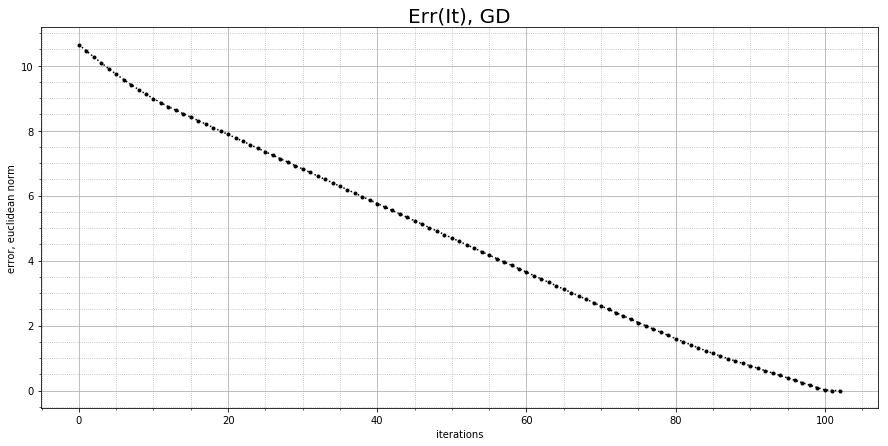

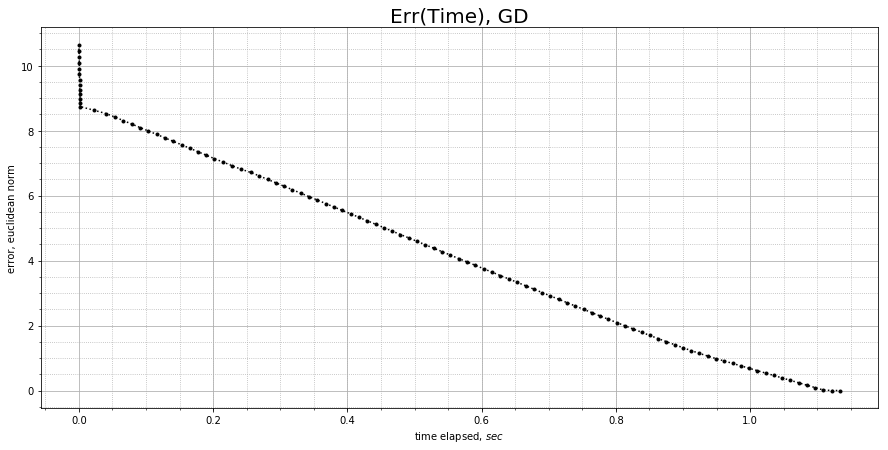

In [5]:
print("---------------Gradient descent ydiff-------------------")

# gradient descent solver initialisation
criteria = gd.stop_criterias.ydiff_stop_crit(0.0001)
gradient_descent_task = gd.solver(oracle, constraints)
gradient_descent_task.set_init_position(np.array([0.,0.,0.]))
stp_size = gd.step_sizes.ConstantStepSize(alpha = 0.3)
gradient_descent_task.set_step_size(stp_size)

# launch
result = gradient_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), GD")
result.ShowTime("Err(Time), GD")

* Градиентный спуск с критерием остановки `xdiff`

---------------Gradient descent xdiff-------------------


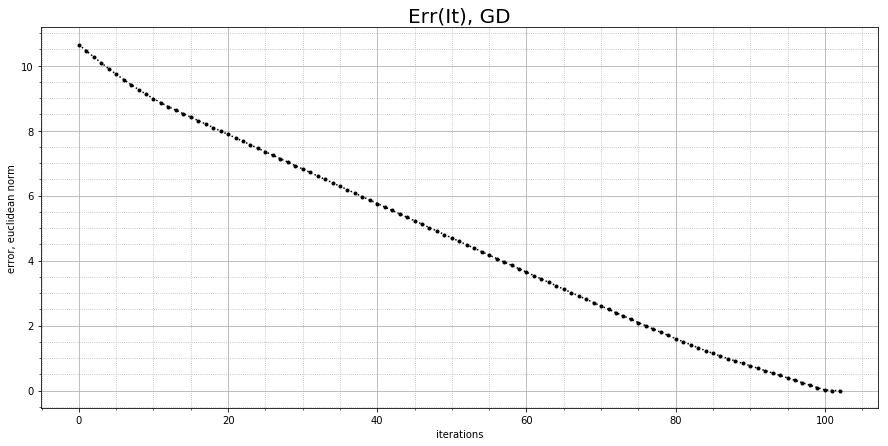

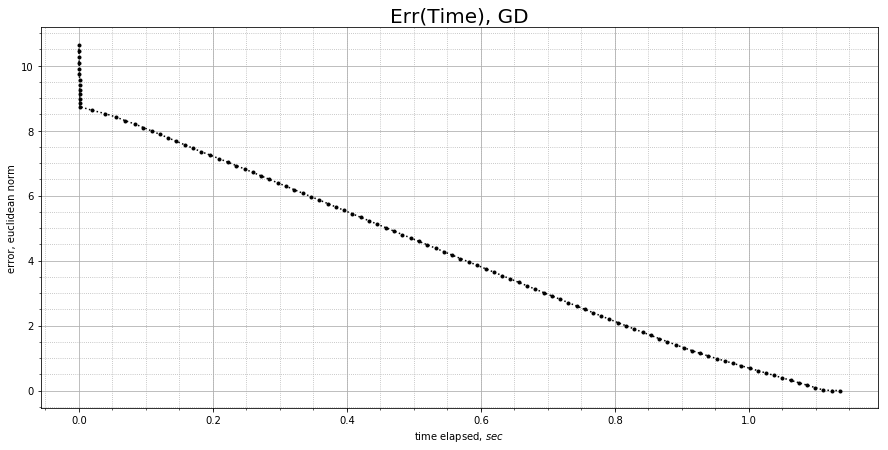

In [6]:
print("---------------Gradient descent xdiff-------------------")

# gradient descent solver initialisation
criteria = gd.stop_criterias.xdiff_stop_crit(0.0001)
gradient_descent_task = gd.solver(oracle, constraints)
gradient_descent_task.set_init_position(np.array([0.,0.,0.]))
stp_size = gd.step_sizes.ConstantStepSize(alpha = 0.3)
gradient_descent_task.set_step_size(stp_size)

# launch
result = gradient_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), GD")
result.ShowTime("Err(Time), GD")

-------------------Heavy ball-------------------------


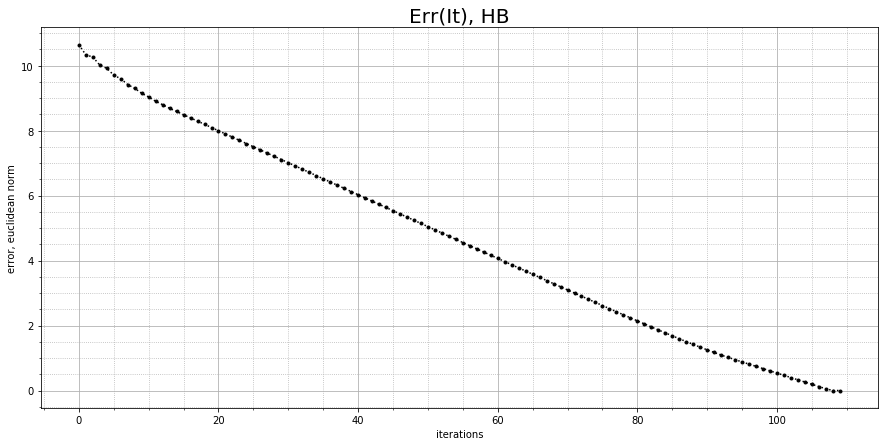

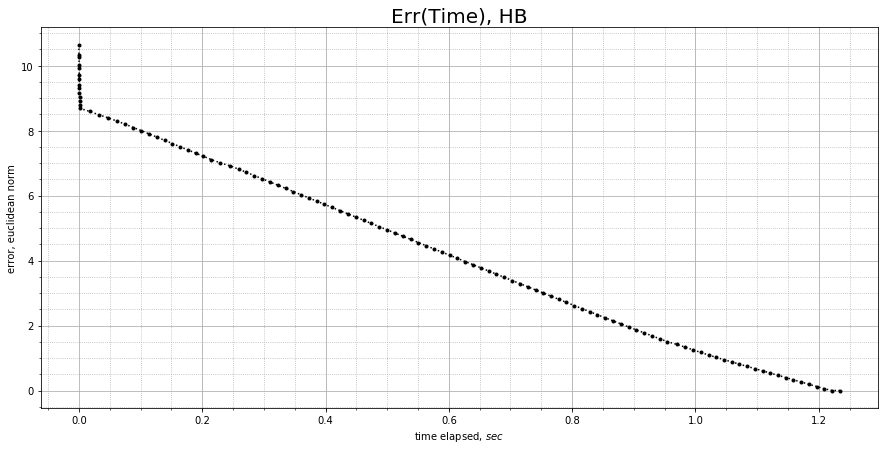

In [4]:
print("-------------------Heavy ball-------------------------")
# heavy ball descent solver initialisation
init_point = np.array([0.,0.,0.])
criteria = nst.stop_criterias.ydiff_stop_crit(0.00001)
heavy_ball_task = hb.solver(oracle, constraints)
heavy_ball_task.set_init_position(init_point)
heavy_ball_task.set_alpha(0.5, 0.8)

# launch
result = heavy_ball_task.make(criteria)

# result showing
result.ShowIterations("Err(It), HB")
result.ShowTime("Err(Time), HB")

### Heavy ball

-------------------Heavy ball-------------------------


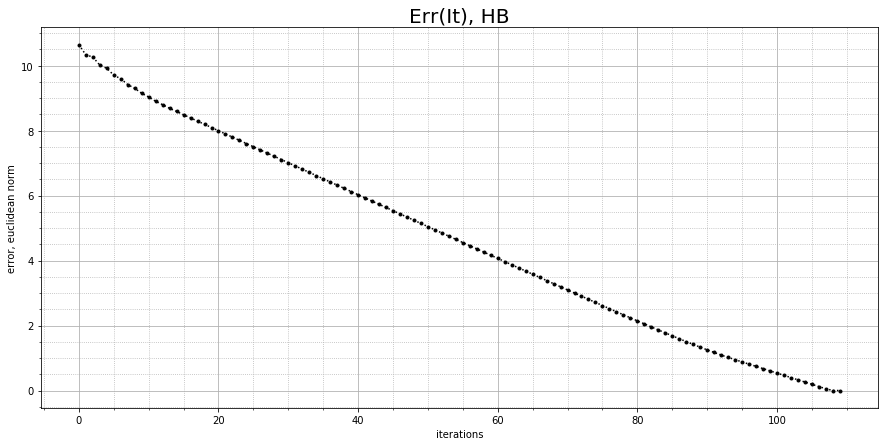

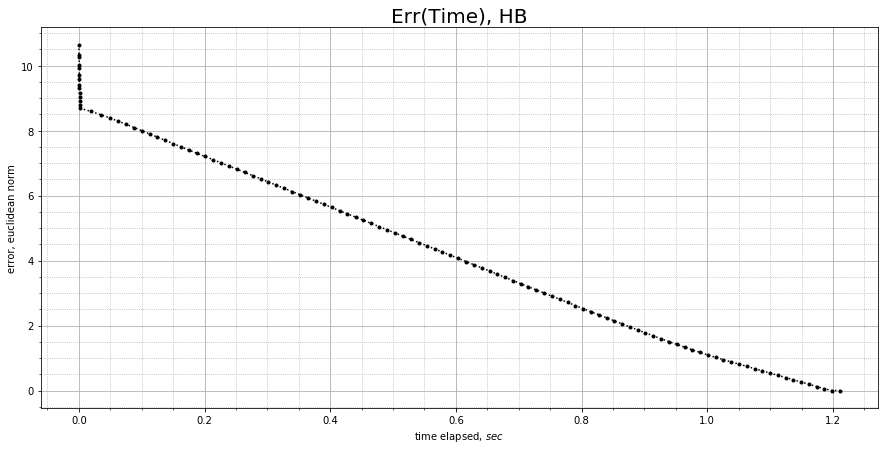

In [8]:
print("-------------------Heavy ball-------------------------")
# heavy ball descent solver initialisation
init_point = np.array([0.,0.,0.])
criteria = nst.stop_criterias.xdiff_stop_crit(0.00001)
heavy_ball_task = hb.solver(oracle, constraints)
heavy_ball_task.set_init_position(init_point)
heavy_ball_task.set_alpha(0.5, 0.8)

# launch
result = heavy_ball_task.make(criteria)

# result showing
result.ShowIterations("Err(It), HB")
result.ShowTime("Err(Time), HB")

### Nesterov method

* Нестеров с критерием остановки `ydiff`

------------------Nesterov--------------------------


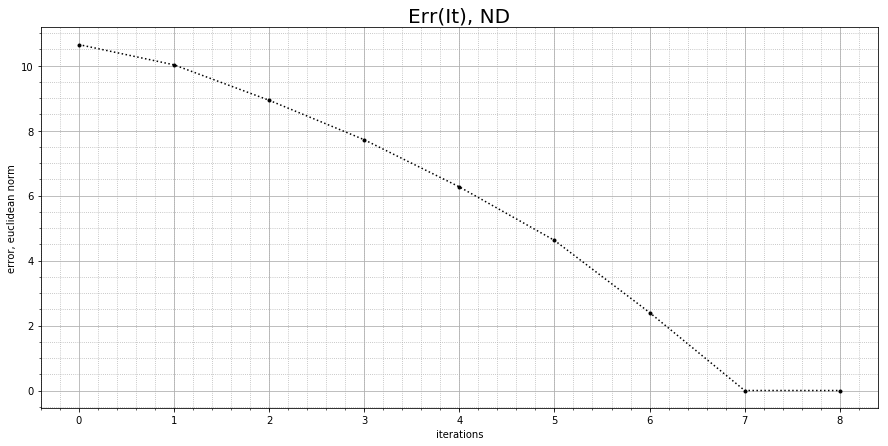

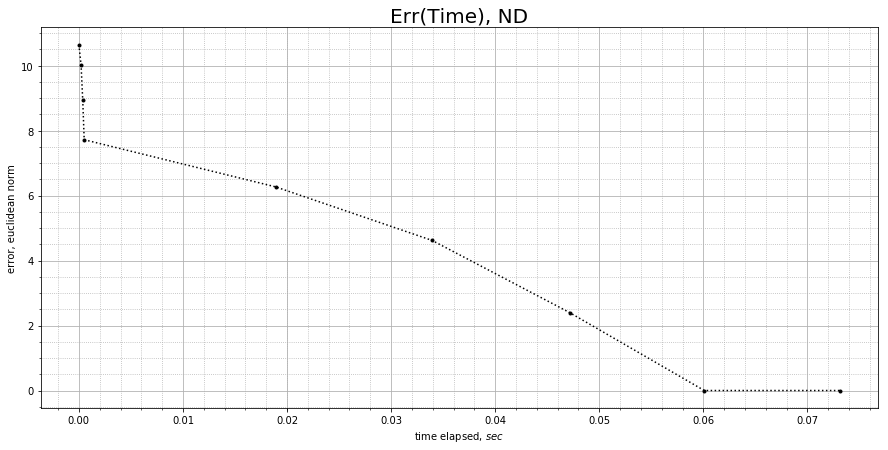

In [10]:
print("------------------Nesterov--------------------------")

# nesterov descent solver initialisation
criteria = nst.stop_criterias.ydiff_stop_crit(0.00001)
nesterov_descent_task = nst.solver(oracle, constraints)
nesterov_descent_task.set_init_position(np.array([0.,0.,0.]))
stp_size = nst.step_sizes.ConstantStepSize(alpha = 1)
nesterov_descent_task.set_step_size(stp_size)

# launch
result = nesterov_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), ND")
result.ShowTime("Err(Time), ND")



* Нестеров с критерием остановки `xdiff`

------------------Nesterov--------------------------


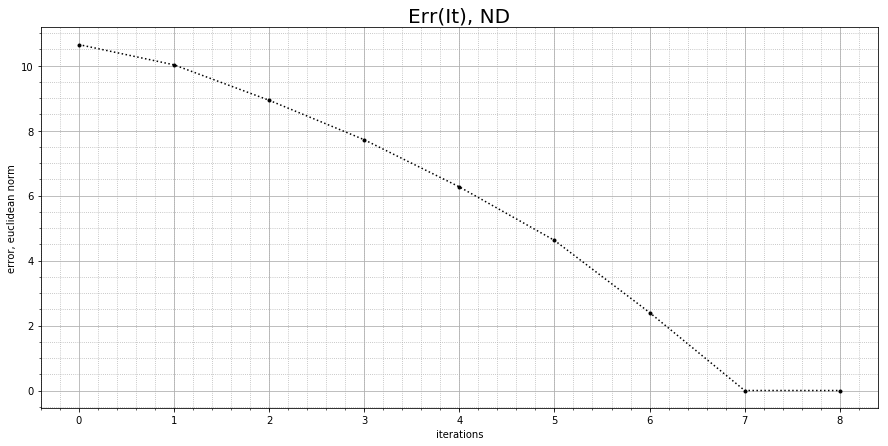

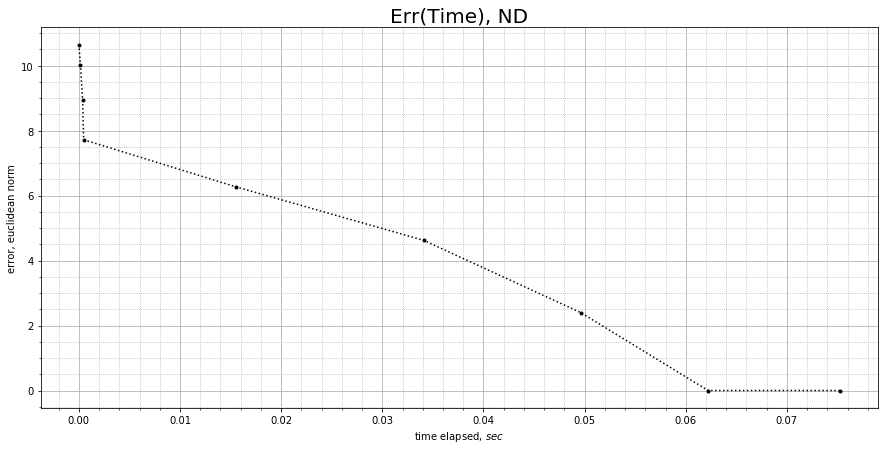

In [11]:
print("------------------Nesterov--------------------------")

# nesterov descent solver initialisation
criteria = nst.stop_criterias.xdiff_stop_crit(0.00001)
nesterov_descent_task = nst.solver(oracle, constraints)
nesterov_descent_task.set_init_position(np.array([0.,0.,0.]))
stp_size = nst.step_sizes.ConstantStepSize(alpha = 1)
nesterov_descent_task.set_step_size(stp_size)

# launch
result = nesterov_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), ND")
result.ShowTime("Err(Time), ND")



Выводы: метод Нестерова, как и ожидалось от него, работает быстрее всего. В свою очередь на обычной задаче линейного программировани метод тяжёлого шарика работает чуть медленнее обычного градиентного спуска, потому что задача достаточно простая.

Видно, что xdiff критерий позволяет достигать такой же точности, но при этом происходит меньше вызовов функции и она работает быстрее.

Теперь рассмотрим методы второго порядка:

1) Метод Ньютона

2) Метод внутренней точки

### Newton method

Используем `iteration_stop_criteria`. Заметим, что метод сходится очень быстро, примерно за 10 итераций

-------------------Newton-------------------------


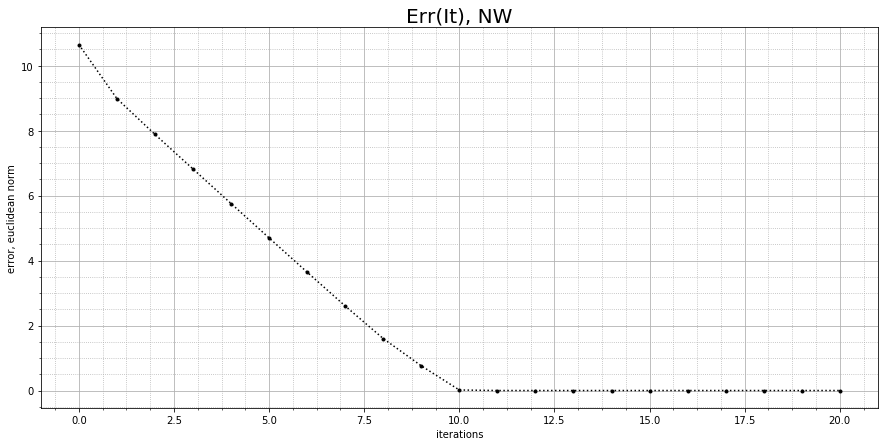

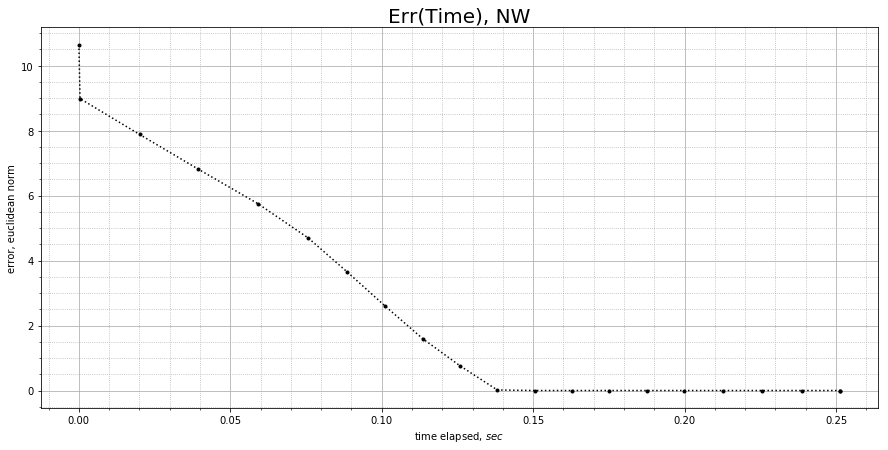

In [13]:
print("-------------------Newton-------------------------")

# newton descent solver initialisation
init_point = np.array([0.,0.,0.])
criteria = nw.stop_criterias.iteration_stop_crit(20)
newton_task = nw.solver(oracle_2, constraints)
newton_task.set_init_position(init_point)
stp_size = gd.step_sizes.ConstantStepSize(alpha = 0.3)
newton_task.set_step_size(stp_size)

# launch
result = newton_task.make(criteria)

# result showing
result.ShowIterations("Err(It), NW")
result.ShowTime("Err(Time), NW")

### Inernal point method

-----------------Internal point--------------------


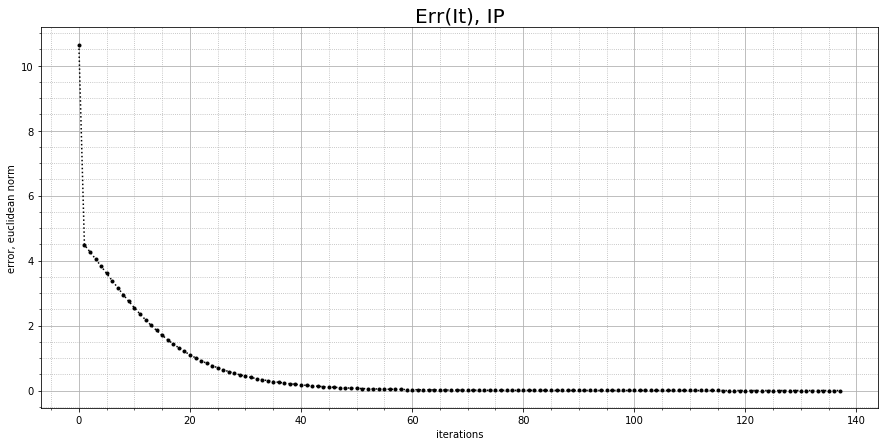

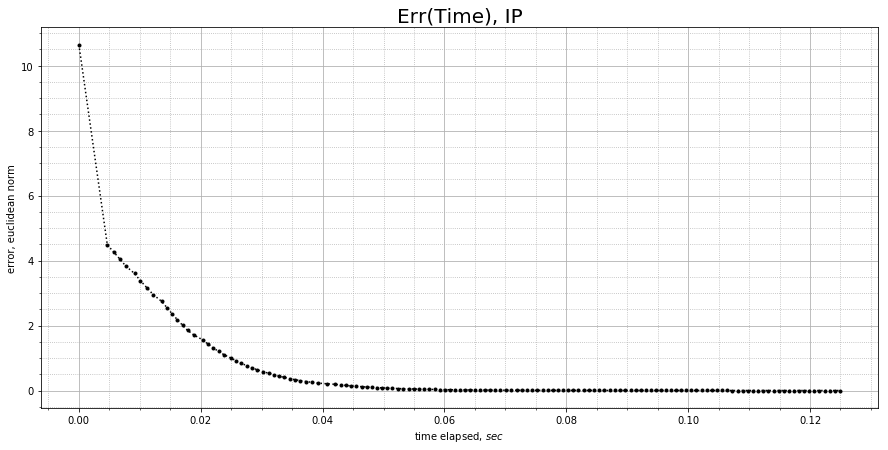

In [14]:
print("-----------------Internal point--------------------")

# internal point solver initialisation
internal_point_task = ip.solver(constraints, oracle_2)
internal_point_task.set_init_log_barrier_coeff(t=1)
internal_point_task.set_init_position(np.array([0.,0.,0.]))

# launch
result = internal_point_task.make(tol=0.00001)

# result showing
result.ShowIterations("Err(It), IP")
result.ShowTime("Err(Time), IP")

Видно, что в самом начале метод второго порядка сходится быстро, а потом постепенно сглаживается, тогда как методы первого порядка на этой задаче равномерно уменьшали ошибку на каждой итерации, хотя метод внутренней точки и сходится быстрее. 

Перейдём к второй функции, которую мы рассматривали.

In [15]:
# task 2 initialisation
F = np.array([
    [-1, 1],
    [1, -1],
    [0, 1],
    [1, 0]
])
g = np.array([1, 1, 3, 3])
a = np.array([1, 1])
b = 1
c = np.array([1, 1])
d = 1

oracle = task_2.first_order_oracle(a, b, c, d)
oracle_2 = task_2.second_order_oracle(a, b, c, d)
constraints = task_2.constraints(F, g, c, d)

Рассмотрим методы первого порядка, которые мы реализовали.

1)Обычный градиентный спуск

2)Методы тяжёлого шарика

3)Метод Нестерова

### Gradient descent

* Градиентный спуск с `ydiff` критерием остановки

---------------Gradient descent-------------------


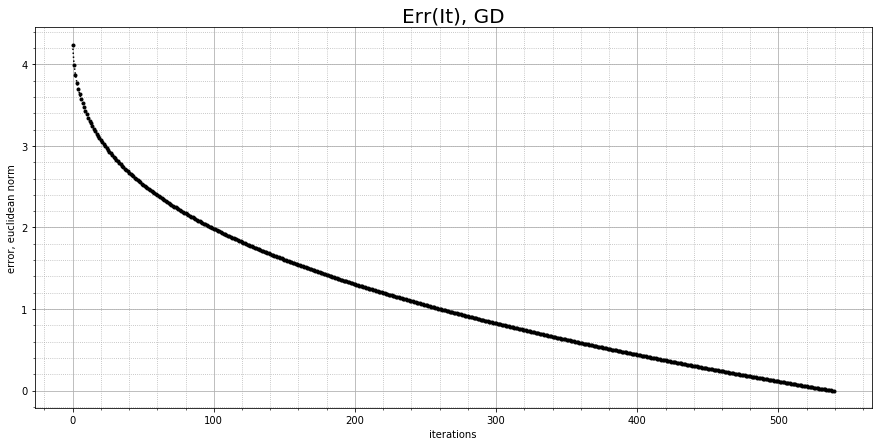

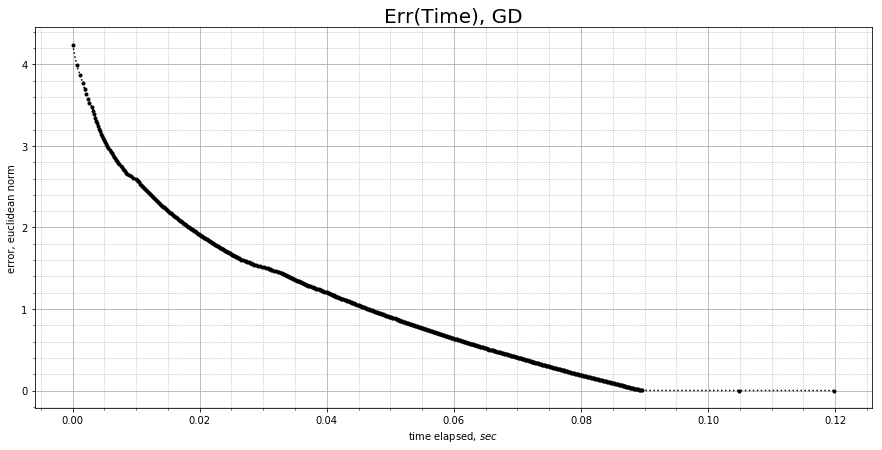

In [18]:
print("---------------Gradient descent-------------------")
# gradient descent solver initialisation
init_point = constraints.projection(np.array([0, 0]))
criteria = gd.stop_criterias.ydiff_stop_crit(0.00001)
gradient_descent_task = gd.solver(oracle, constraints)
gradient_descent_task.set_init_position(init_point)
stp_size = gd.step_sizes.ArmijoStepSize(oracle, constraints, init_alpha = 0.1)
gradient_descent_task.set_step_size(stp_size)

# launch
result = gradient_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), GD")
result.ShowTime("Err(Time), GD")

* Градиентный спуск с `xdiff` критерием остановки

---------------Gradient descent-------------------


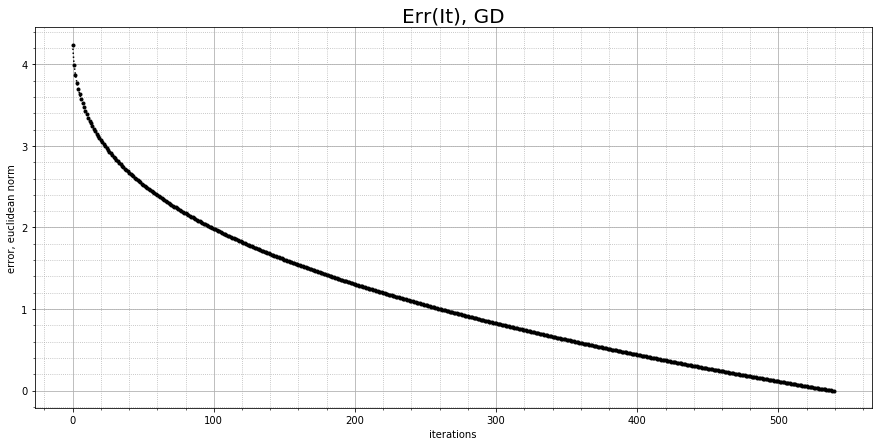

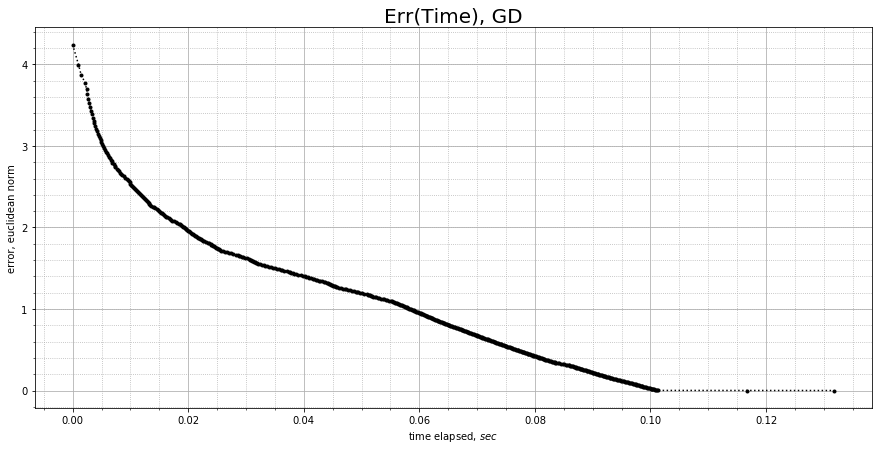

In [19]:
print("---------------Gradient descent-------------------")
# gradient descent solver initialisation
init_point = constraints.projection(np.array([0, 0]))
criteria = gd.stop_criterias.xdiff_stop_crit(0.00001)
gradient_descent_task = gd.solver(oracle, constraints)
gradient_descent_task.set_init_position(init_point)
stp_size = gd.step_sizes.ArmijoStepSize(oracle, constraints, init_alpha = 0.1)
gradient_descent_task.set_step_size(stp_size)

# launch
result = gradient_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), GD")
result.ShowTime("Err(Time), GD")

### Heavy ball

* Тяжелый шарик с `ydiff` критерием остановки

-------------------Heavy ball-------------------------


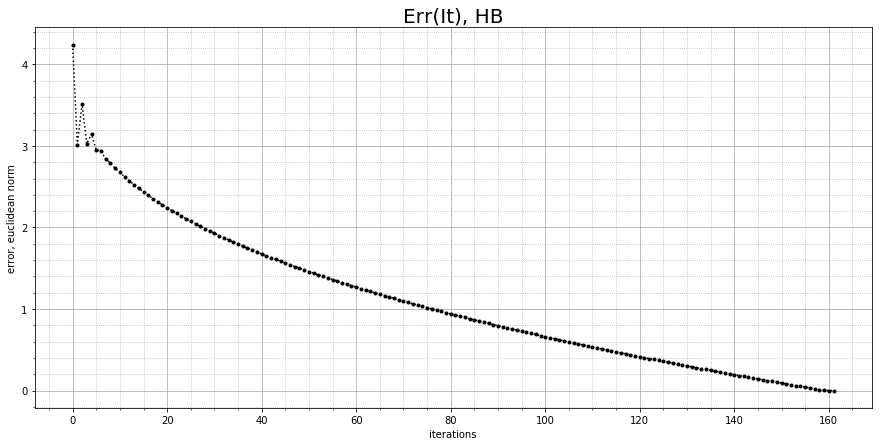

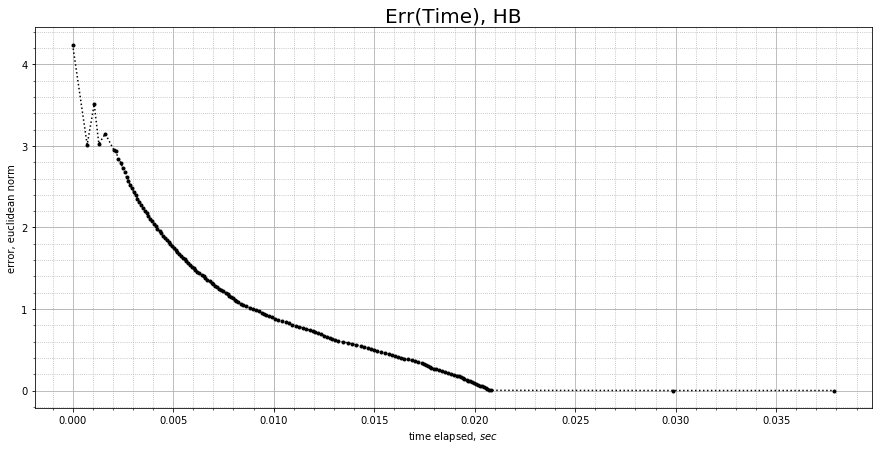

In [20]:
print("-------------------Heavy ball-------------------------")
# heavy ball descent solver initialisation
init_point = constraints.projection(np.array([0, 0]))
criteria = nst.stop_criterias.ydiff_stop_crit(0.00001)
heavy_ball_task = hb.solver(oracle, constraints)
heavy_ball_task.set_init_position(init_point)
heavy_ball_task.set_alpha(0.5, 0.5)

# launch
result = heavy_ball_task.make(criteria)

# result showing
result.ShowIterations("Err(It), HB")
result.ShowTime("Err(Time), HB")

* Тяжелый шар с `xdiff` критерием остановки

-------------------Heavy ball-------------------------


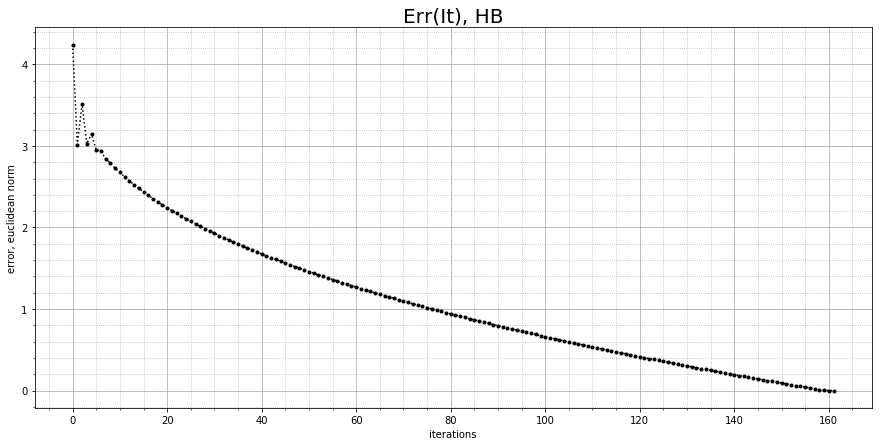

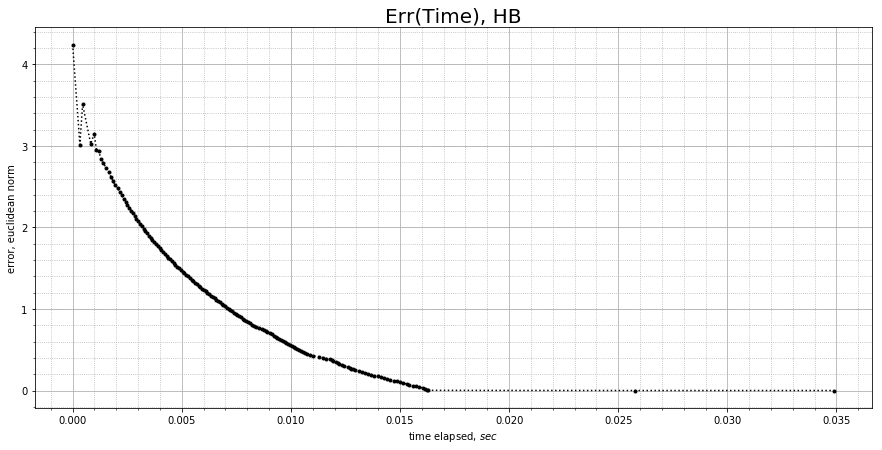

In [21]:
print("-------------------Heavy ball-------------------------")
# heavy ball descent solver initialisation
init_point = constraints.projection(np.array([0, 0]))
criteria = nst.stop_criterias.xdiff_stop_crit(0.00001)
heavy_ball_task = hb.solver(oracle, constraints)
heavy_ball_task.set_init_position(init_point)
heavy_ball_task.set_alpha(0.5, 0.5)

# launch
result = heavy_ball_task.make(criteria)

# result showing
result.ShowIterations("Err(It), HB")
result.ShowTime("Err(Time), HB")

### Nesterov

* Нестеров с `ydiff_stop_criteria`

------------------Nesterov--------------------------


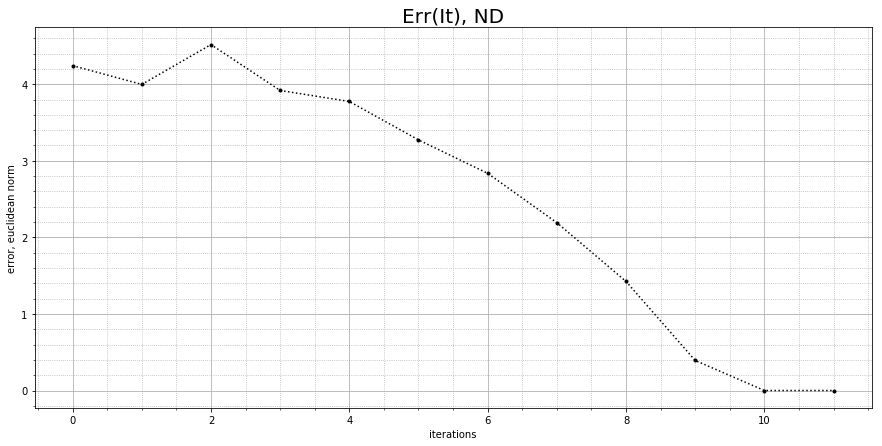

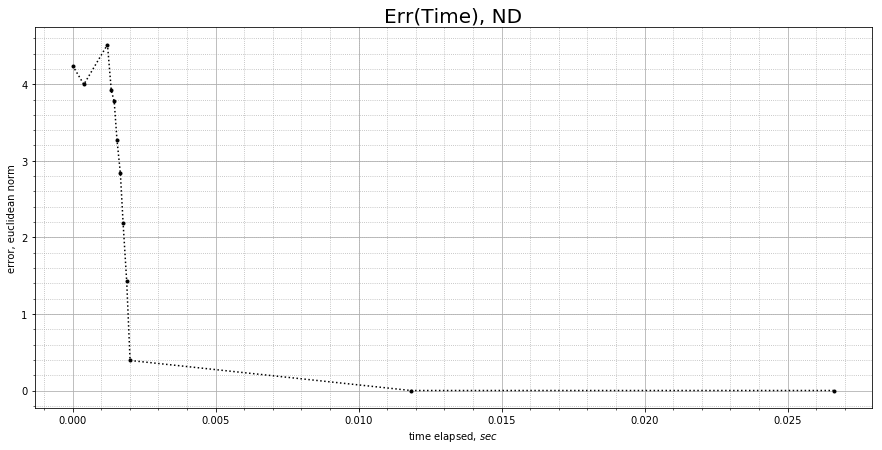

In [22]:
print("------------------Nesterov--------------------------")

# nesterov descent solver initialisation
init_point = constraints.projection(np.array([0, 0]))
criteria = nst.stop_criterias.ydiff_stop_crit(0.00001)
nesterov_descent_task = nst.solver(oracle, constraints)
nesterov_descent_task.set_init_position(init_point)
stp_size = nst.step_sizes.ConstantStepSize(alpha=0.1)
nesterov_descent_task.set_step_size(stp_size)

# launch
result = nesterov_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), ND")
result.ShowTime("Err(Time), ND")

* Нестеров с `xdiff_stop_criteria`

------------------Nesterov--------------------------


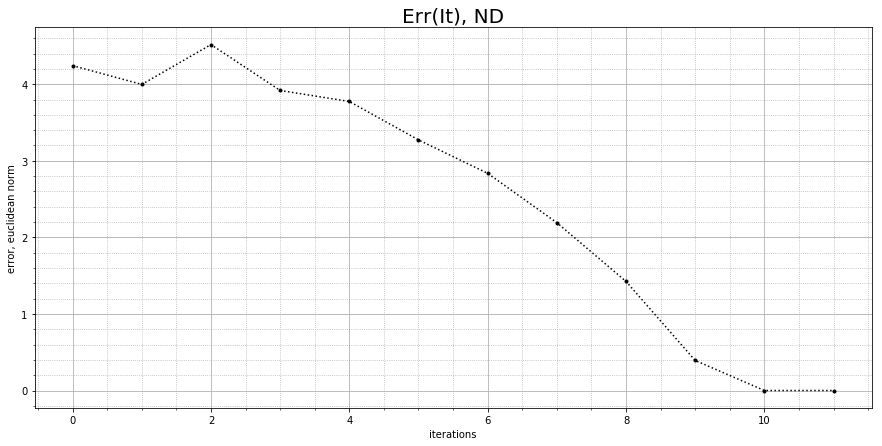

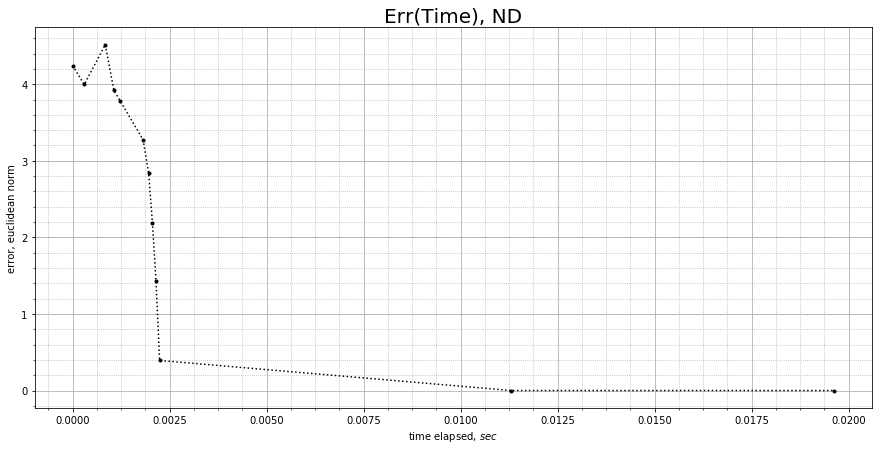

In [15]:
print("------------------Nesterov--------------------------")

# nesterov descent solver initialisation
init_point = constraints.projection(np.array([0, 0]))
criteria = nst.stop_criterias.xdiff_stop_crit(0.00001)
nesterov_descent_task = nst.solver(oracle, constraints)
nesterov_descent_task.set_init_position(init_point)
stp_size = nst.step_sizes.ConstantStepSize(alpha=0.1)
nesterov_descent_task.set_step_size(stp_size)

# launch
result = nesterov_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), ND")
result.ShowTime("Err(Time), ND")

На этой, более сложной задаче, уже видно, что метод тяжёлого шарика работает быстрее обычного градиентного спуска (несмотря на небольшие осцилляции в начале). Он сходится примерно в 3 раза быстрее, чем градиентный спуск.

Как мы видим, хоть метод Нестерова не является монотонным, он сходится гораздо быстрее остальных методов по количеству, меньше чем за 10 итераций, что обусловленно дороговизной каждой операции, но большого прироста по времени мы из-за этого не получили.

Теперь рассмотрим методы второго порядка:

1) Метод Ньютона

2) Метод внутренней точки

### Newton method

В качестве критерия остановки используем `xdiff_stop_criteria`

-------------------Newton-------------------------


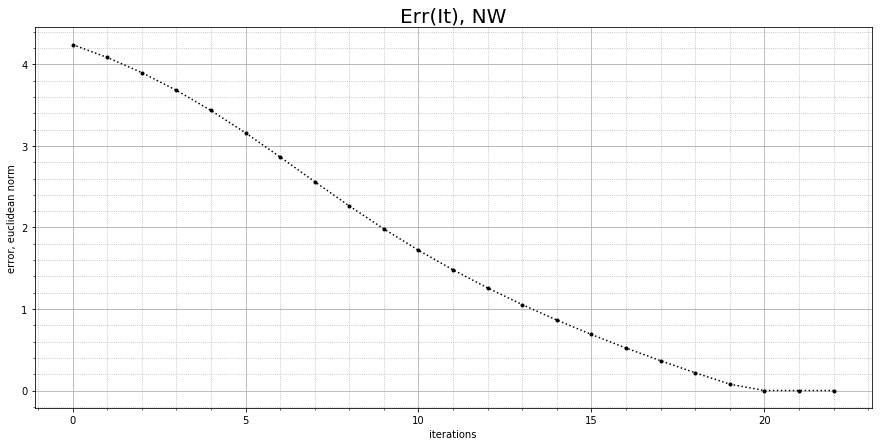

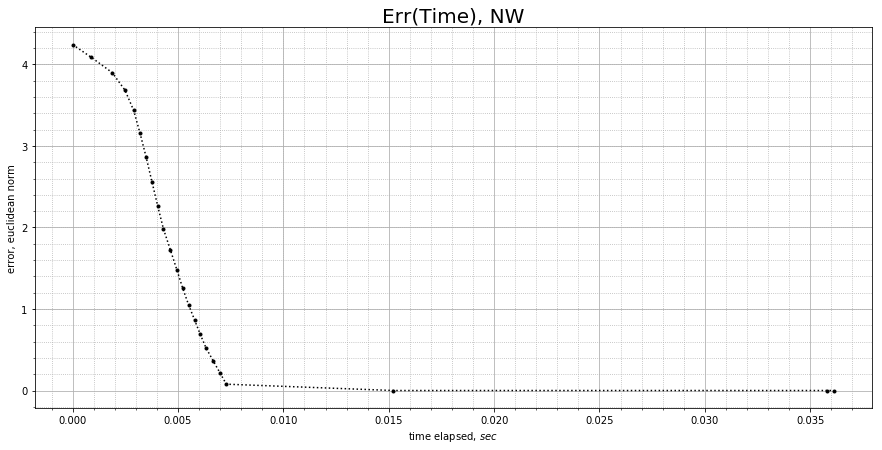

In [23]:
print("-------------------Newton-------------------------")

# newton descent solver initialisation
init_point = np.array([0.,0.])
criteria = nw.stop_criterias.xdiff_stop_crit(0.0001)
newton_task = nw.solver(oracle_2, constraints)
newton_task.set_init_position(init_point)
stp_size = gd.step_sizes.ArmijoStepSize(oracle_2, constraints, init_alpha=0.5)
newton_task.set_step_size(stp_size)

# launch
result = newton_task.make(criteria)

# result showing
result.ShowIterations("Err(It), NW")
result.ShowTime("Err(Time), NW")

### Internal point method

-----------------Internal point--------------------


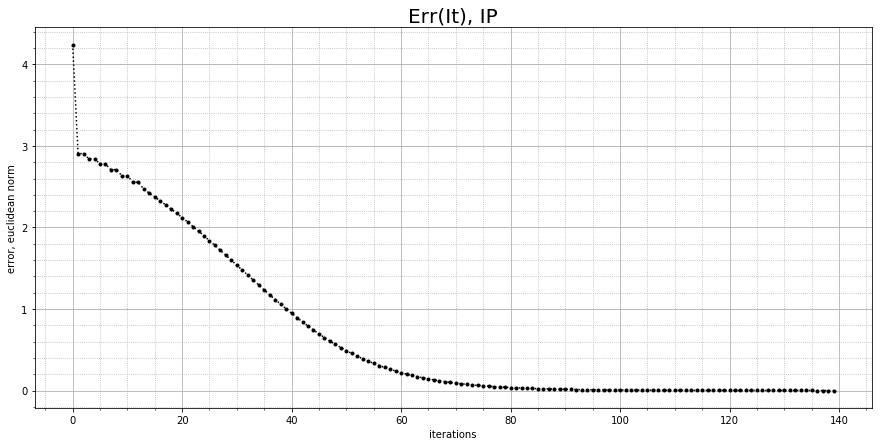

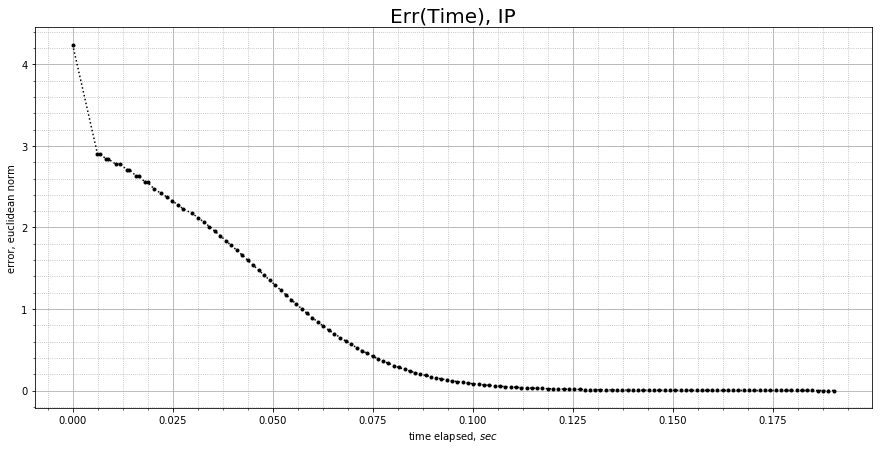

In [24]:
print("-----------------Internal point--------------------")

# internal point solver initialisation
internal_point_task = ip.solver(constraints, oracle_2)
internal_point_task.set_init_log_barrier_coeff(t=1)
internal_point_task.set_init_position(np.array([0.,0.]))

# launch
result = internal_point_task.make(tol=0.00001)

# result showing
result.ShowIterations("Err(It), IP")
result.ShowTime("Err(Time), IP")

Метод второго порядка, как видно, сходится быстрее на более сложной задаче. 